In [2]:
from google.colab import files
uploaded = files.upload()


Saving ecml.json to ecml.json


In [3]:
#Changing json to a csv
import pandas as pd
df_valid_tmp = pd.read_json ('ecml.json')
df_valid_tmp.to_csv ('valid.csv', index = None)
df_valid_tmp.rename(columns = {'pattern':'Payloads', 'type':'Types'}, inplace = True)

In [4]:
df_valid = df_valid_tmp[df_valid_tmp.Types == 'valid']
df_valid

,Payloads,Types
0,crteyreti=wsn&et3tf6shov=tdsviee y fum$oh3;ore...,valid
1,*;q=0.7,valid
2,nhgiopie/7.8.4.7.0,valid
3,/dyylkl.xd9cpu/4ot0ta/ts6xnrp1/hssh/a2cuerht/s...,valid
4,/2m6vlb1r37jspc/cwvv/mbar/oqrd0/msc/etceebwgi/...,valid
...,...,...
35001,/f041ihx@/kp/cdxwdk5r96hzmza8r/f2s.shtml,valid
35002,hco-=9858907&xseirwhte=iexecc&0neuwe8=mmi&xgf....,valid
35003,f6het0kvylks=77&rru2xjsock_streamwt4=auaru2c29...,valid
35004,*,valid


In [32]:
  import pandas as pd

  xss = 'xss.txt'
  sqli = 'sql.txt'
  nosql = 'nosql.txt'
  lfi = 'lfi.txt'
  shell = 'shell.txt'
  crlf = 'crlf.txt'
  ssti = 'ssti.txt'
  ssi = 'ssi.txt'



  files_array = [xss, sqli, nosql, lfi, shell, ssti, crlf, ssi]

  #This function will combine all wordlists into a single csv
  def processdata_and_store(files_array):
    #Create empty data frame
    empty_df = pd.DataFrame(columns=['Payloads', 'Types'])
    for files in range(len(files_array)):
        unique_set = set()
        with open(files_array[files], 'r') as f:
          #Removes "\n"
          for add in f.read().strip().splitlines():
            unique_set.add(add)

        unique_list = list(unique_set)
        while("" in unique_list) : 
          unique_list.remove("") 
        for add_payload in unique_list:
          empty_df = empty_df.append({'Payloads': add_payload, 'Types' : files_array[files].split(".")[0]}, ignore_index=True)
        
    empty_df.to_csv('dataset.csv', encoding='utf-8')


  processdata_and_store(files_array)

In [6]:
df = pd.read_csv('dataset.csv').drop(columns='Unnamed: 0')

In [7]:
df

,Payloads,Types
0,"<select onbeforecut=""alert(1)"" contenteditable...",xss
1,"<th oncontextmenu=""alert(1)"">test</th>",xss
2,</script> %>/,xss
3,<textarea autofocus onfocusin=alert(1)>test</t...,xss
4,"<body onBeforeUnload body onBeforeUnload=""java...",xss
...,...,...
15014,"<!--#echo var=""remote_ident"" -->",ssi
15015,"<!--#echo var=""remote_addr"" -->",ssi
15016,"<!--#include virtual=""https://crowdshield.com/...",ssi
15017,"<!--#exec cmd=""sleep 5"" -->",ssi


In [8]:
#Join both datasets as one
clean_df_tmp = pd.concat([df, df_valid])

In [9]:
clean_df_tmp

,Payloads,Types
0,"<select onbeforecut=""alert(1)"" contenteditable...",xss
1,"<th oncontextmenu=""alert(1)"">test</th>",xss
2,</script> %>/,xss
3,<textarea autofocus onfocusin=alert(1)>test</t...,xss
4,"<body onBeforeUnload body onBeforeUnload=""java...",xss
...,...,...
35001,/f041ihx@/kp/cdxwdk5r96hzmza8r/f2s.shtml,valid
35002,hco-=9858907&xseirwhte=iexecc&0neuwe8=mmi&xgf....,valid
35003,f6het0kvylks=77&rru2xjsock_streamwt4=auaru2c29...,valid
35004,*,valid


In [10]:
clean_df = clean_df_tmp.drop_duplicates(subset=['Payloads', 'Types'])

In [11]:
clean_df

,Payloads,Types
0,"<select onbeforecut=""alert(1)"" contenteditable...",xss
1,"<th oncontextmenu=""alert(1)"">test</th>",xss
2,</script> %>/,xss
3,<textarea autofocus onfocusin=alert(1)>test</t...,xss
4,"<body onBeforeUnload body onBeforeUnload=""java...",xss
...,...,...
35000,"beinrm-tet, apw-hc, osnent-wmt4s, e-nsrt;q=0.8...",valid
35001,/f041ihx@/kp/cdxwdk5r96hzmza8r/f2s.shtml,valid
35002,hco-=9858907&xseirwhte=iexecc&0neuwe8=mmi&xgf....,valid
35003,f6het0kvylks=77&rru2xjsock_streamwt4=auaru2c29...,valid


In [12]:
clean_df.to_csv ('waf_dataset.csv', index = None)

In [13]:
from google.colab import files
files.download('waf_dataset.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
counts = clean_df['Types'].value_counts()

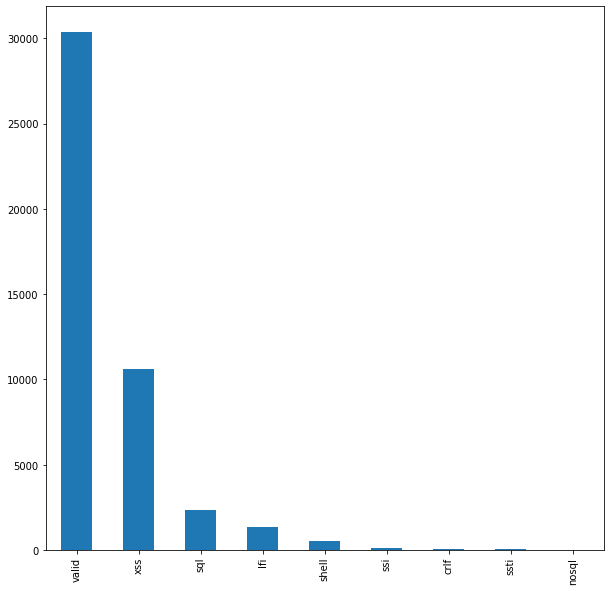

In [35]:
#Plot the chart
%matplotlib inline
import matplotlib.pyplot as plt
counts.plot.bar(figsize=(10, 10))

In [16]:
import numpy as np
#Load our dataset
waf_df = pd.read_csv('waf_dataset.csv')
X = waf_df['Payloads'].to_numpy().astype(str)
y = waf_df['Types'].to_numpy().astype(str)
print(len(X))
print(len(y))

45372
45372


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

#Prepare traning and testing sets
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

np.savez('dataset', trainX=trainX, testX=testX, trainY=trainY, testY=testY)

In [18]:
#Add the best params
model = make_pipeline(TfidfVectorizer(input = 'content', lowercase = True, analyzer = 'char', max_features = 1024, ngram_range = (1, 2)), SVC(C = 10, kernel = 'rbf'))

#Train model
model.fit(trainX, trainY)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=1024,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc',
                 SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='

In [19]:
#Test score
model.score(testX, testY)

0.9972670369390814

In [20]:
#Save the model for future use
import pickle

filename = 'waf_model.sav'

pickle.dump(model, open(filename, 'wb'))


In [21]:
#Load saved model
loaded_model = pickle.load(open('waf_model.sav', 'rb'))

In [33]:
#List of payloads to test waf model
parameters = ["%3f%0dshivang:crlf=injection", "query=home&homeprice=4300","#shivang{{5*7}}","<pre><!--#exec cmd=\"id\"--></pre>","../\\\\\\../\\\\\\../\\\\\\etc/passwd%00%00", "query=shivang)))' OR 1=2#-- -", 
              "something;|id|", "{$gt: ''}",
              "<img src=x onerror=\"&#0000106&#0000097&#0000118&#0000097&#0000115&#0000099&#0000114&#0000105&#0000112&#0000116&#0000058&#0000097&#0000108&#0000101&#0000114&#0000116&#0000040&#0000039&#0000088&#0000083&#0000083&#0000039&#0000041\">"]
temp_array = []

In [23]:
#Function acts as backend for payload detection

def waf_check(parameters, temp_array):
  for detect in range(len(parameters)):
    temp_array.append(parameters[detect])
    prediction = loaded_model.predict(temp_array)
    if "valid" in prediction:
      print("\n[+] You can access our site!\n")
    else:
      print("[!] Attack detected!...Hold your horses!")
      for result in prediction:
        print(f"[~] Attack type", result)
    temp_array = []
    

In [34]:
#Call the api

waf_check(parameters, temp_array)

[!] Attack detected!...Hold your horses!
[~] Attack type crlf

[+] You can access our site!

[!] Attack detected!...Hold your horses!
[~] Attack type ssti
[!] Attack detected!...Hold your horses!
[~] Attack type ssi
[!] Attack detected!...Hold your horses!
[~] Attack type lfi
[!] Attack detected!...Hold your horses!
[~] Attack type sql
[!] Attack detected!...Hold your horses!
[~] Attack type shell
[!] Attack detected!...Hold your horses!
[~] Attack type nosql
[!] Attack detected!...Hold your horses!
[~] Attack type xss


In [36]:
from google.colab import files
files.download('waf_model.sav') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>